In [2]:
import pygmt

import datetime
import numpy as np
import pandas as pd
import pygmt
import xarray as xr

#pygmt.show_versions()

In [2]:
#All Maps and Plots Data for plotting and analysis

buoy_lat = [13.5]
buoy_lon = [89]
buoy_labels = ['STB-05', 'STB-01', 'BD-14', 'STB-02','TB-12']

glider_lat = []
glider_lon = []
glider_labels = ['1095', '1096']

argo_lat = []
argo_lon = []
argo_labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

bgc_lat = []
bgc_lon = []
bgc_labels = ['B1','B2','B3','B4','B5','A1','A2','A3']

In [ ]:
#Time Intervals

time_intervals = [(),]

In [3]:
# Load Tsunami Buoys Data

stb_01 = pd.read_csv('E:\\INCOIS WORK\\DATA\\stb-01\\stb-01.csv')
stb_02 = pd.read_csv('E:\\INCOIS WORK\\DATA\\stb-02\\stb-02.csv')

In [80]:
#stb_01.head()
#stb_02.head()

In [4]:
stb_02.describe()

Water Level
count  13200.000000
mean    2790.312093
std        0.583500
min     2788.728000
25%     2789.938000
50%     2790.395000
75%     2790.760000
max     2791.584000

In [5]:
stb_01['datetime']=pd.to_datetime(stb_01['Date']+' '+stb_01['Time'], dayfirst = True)
stb_01 = stb_01.sort_values(by='datetime')

stb_02['datetime']=pd.to_datetime(stb_02['Date']+' '+stb_02['Time'], dayfirst = True)
stb_02 = stb_02.sort_values(by='datetime')

In [6]:
stb_02.head()
stb_01.head()

Date      Time  Water Level            datetime
13655  05-10-2023  18:15:00     3801.549 2023-10-05 18:15:00
13654  05-10-2023  18:30:00     3801.544 2023-10-05 18:30:00
13653  05-10-2023  18:45:00     3801.537 2023-10-05 18:45:00
13652  05-10-2023  19:00:00     3801.530 2023-10-05 19:00:00
13651  05-10-2023  19:15:00     3801.523 2023-10-05 19:15:00

In [7]:
stb_01.set_index('datetime', inplace = True)
stb_02.set_index('datetime', inplace = True)

In [8]:
#stb_01.head()
#stb_02.head()

x1 = stb_01.index
x2 = stb_02.index

y1 = stb_01["Water Level"]
y2 = stb_02["Water Level"]


In [124]:
#stb_01.drop(['Date','Time'], axis=1, inplace = True)

In [9]:
stb_01.index.max()
stb_02.index.max()

Timestamp('2024-02-27 00:00:00')

In [14]:
#Visual for cruise track and points of operations

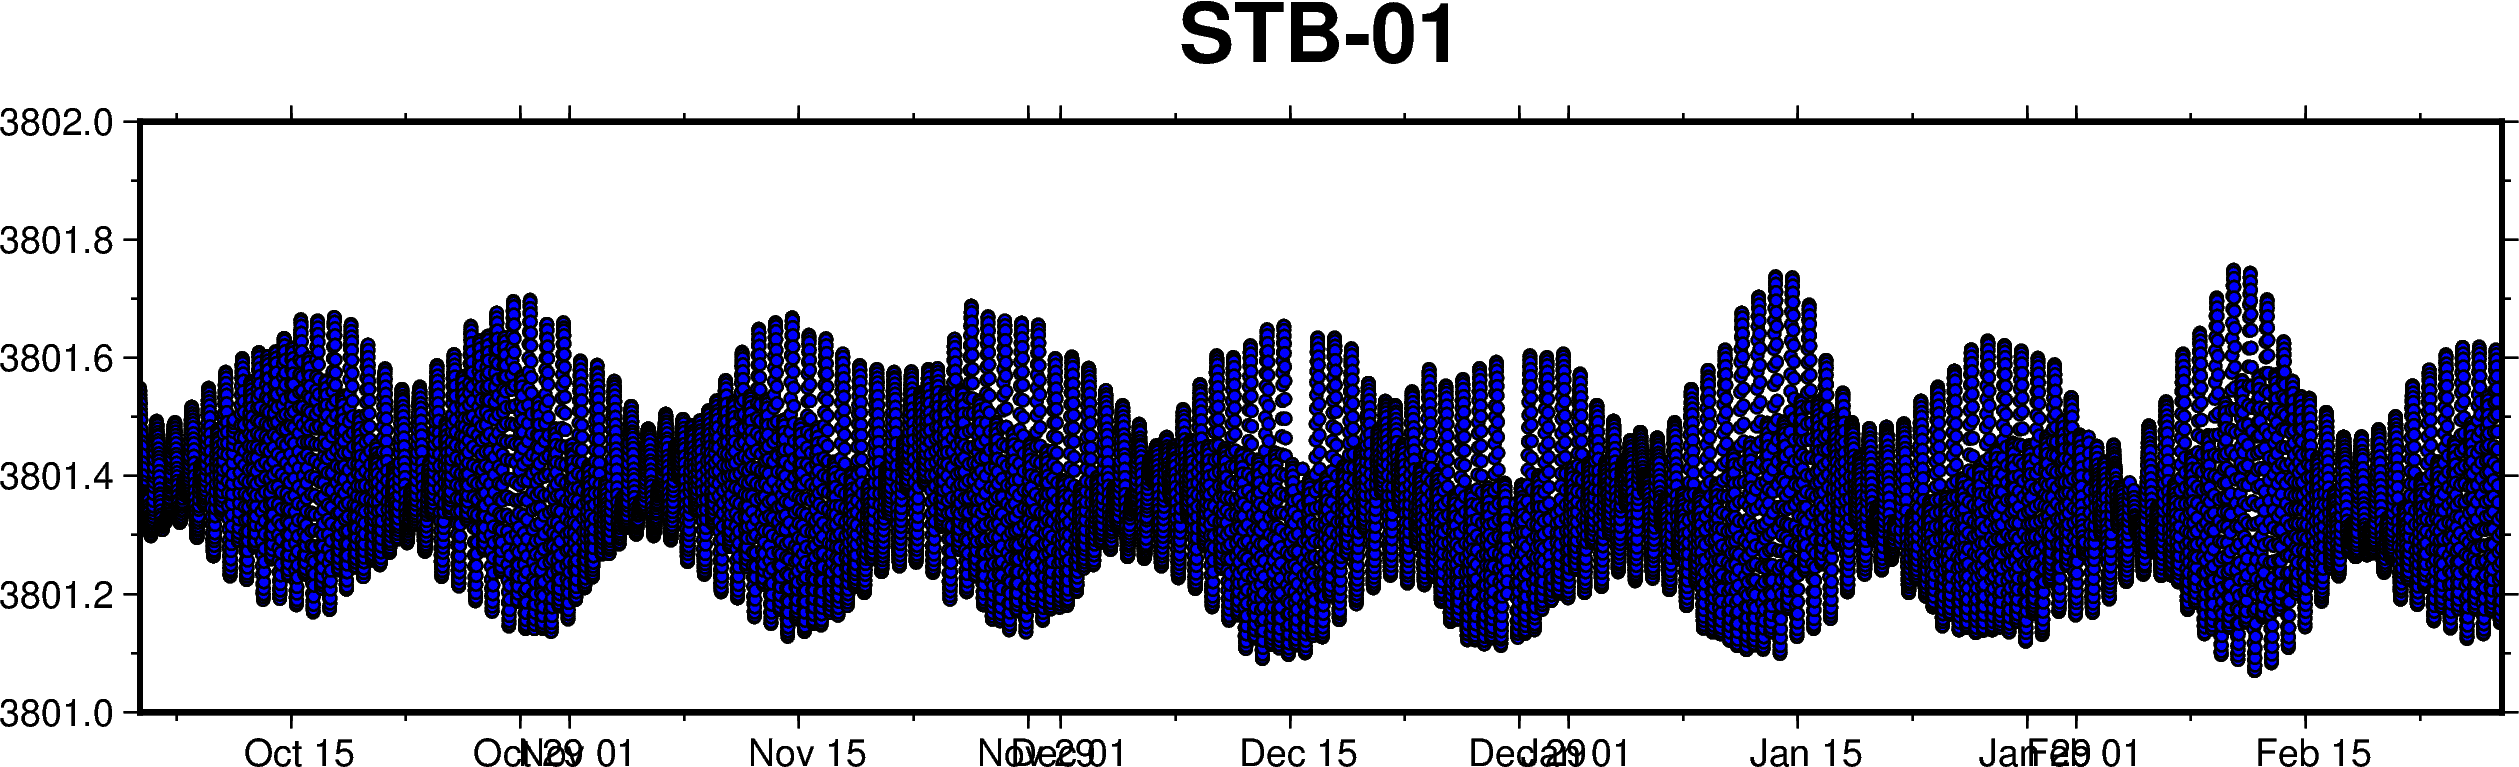

In [10]:
#Visual on Plotting STB-01 and STB02 data of the last 6 months

data_min = 3801
data_max = 3802

fig = pygmt.Figure()


fig.plot(
    projection="X20c/5c",
    region=[stb_01.index.min(),stb_01.index.max() , data_min, data_max],
    frame=["WSen+tSTB-01", "af"],
    x=stb_01.index,
    y=stb_01['Water Level'],
    style="c0.1c",
    pen="0.5p",
    fill="blue",

)
fig.savefig('stb-01.png')
fig.show()

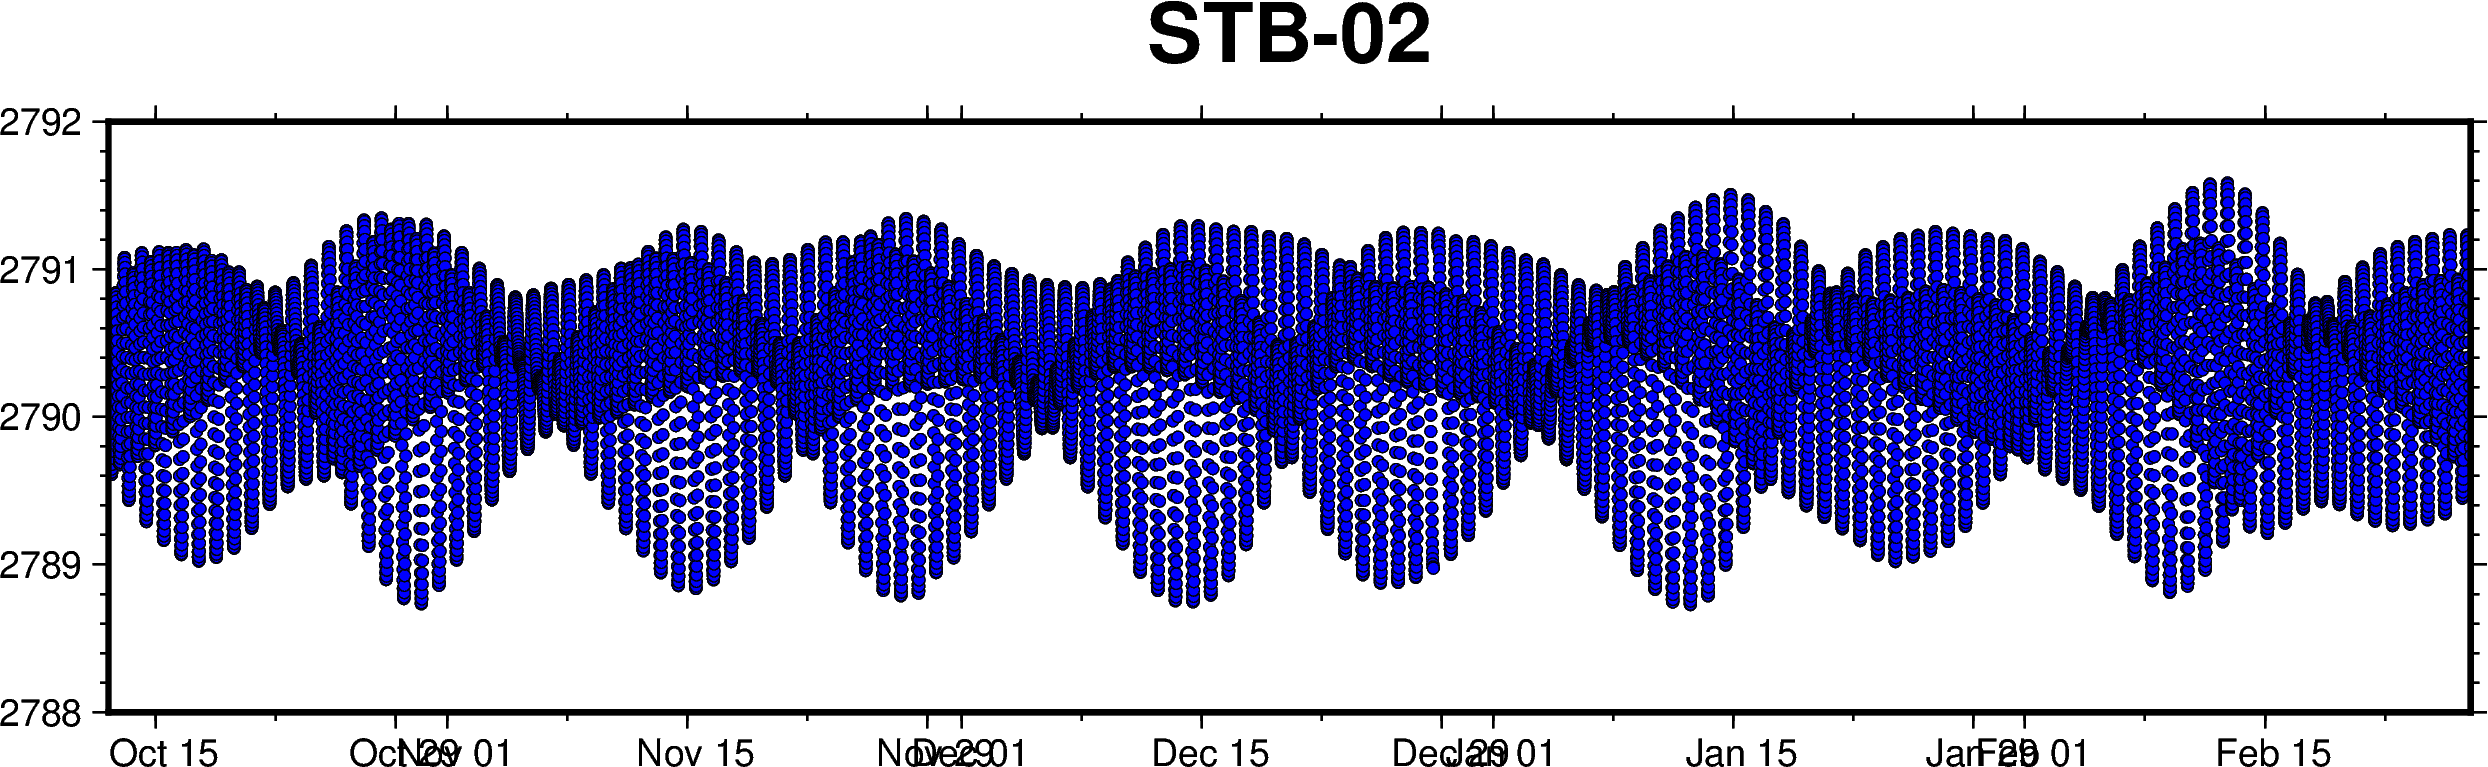

In [11]:
#Visual on Plotting STB-01 and STB02 data of the last 6 months

dat_min = 2788
dat_max = 2792

fig = pygmt.Figure()


fig.plot(
    projection="X20c/5c",
    region=[stb_02.index.min(),stb_02.index.max() , dat_min, dat_max],
    frame=["WSen+tSTB-02", "af"],
    x=stb_02.index,
    y=stb_02['Water Level'],
    style="c0.1c",
    pen="0.2p",
    fill="blue",

)

fig.savefig('stb-02.png')
fig.show()

In [ ]:
# Visual for Argo Floats Deployment Location

In [ ]:
# Cruise Operations and Cruising days map/plot/visual for SN 181

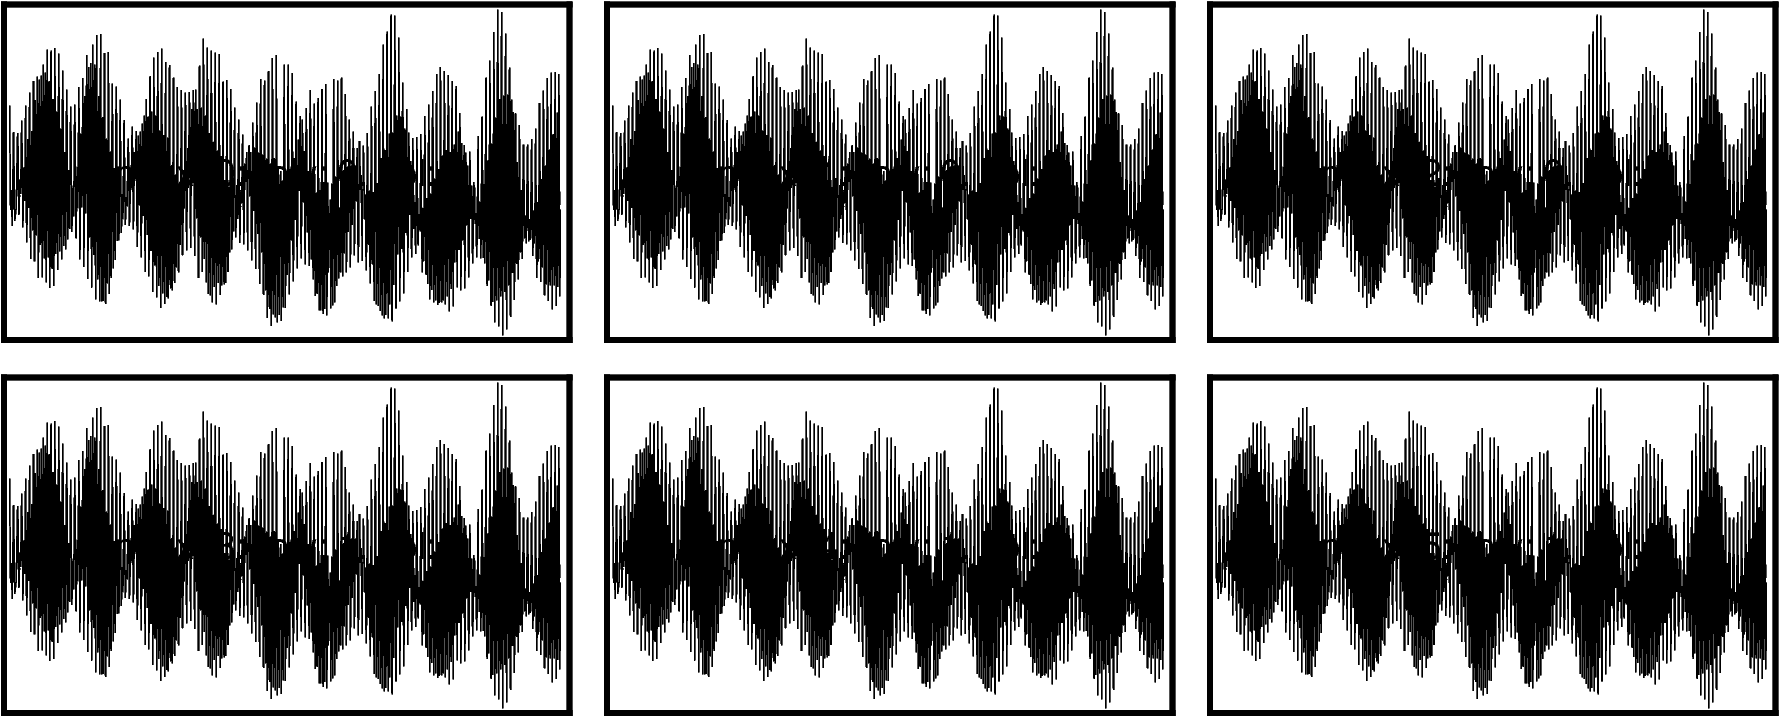

In [12]:
fig = pygmt.Figure()

with fig.subplot(nrows=2, ncols=3, figsize = ("15c", "6c"), frame = "lrtb"):
    for i in range(2): 
        for j in range(3): 
            index = i * 3 + j
            with fig.set_panel(panel=index):
                fig.plot(x=x1, y=y1)
                fig.text(
                    position = 'MC',
                    text = f"index: {index}; row: {i}, col: {j}",
                    region = [x1.min(), x1.max(), y1.min(), y1.max()],
                )

fig.show()

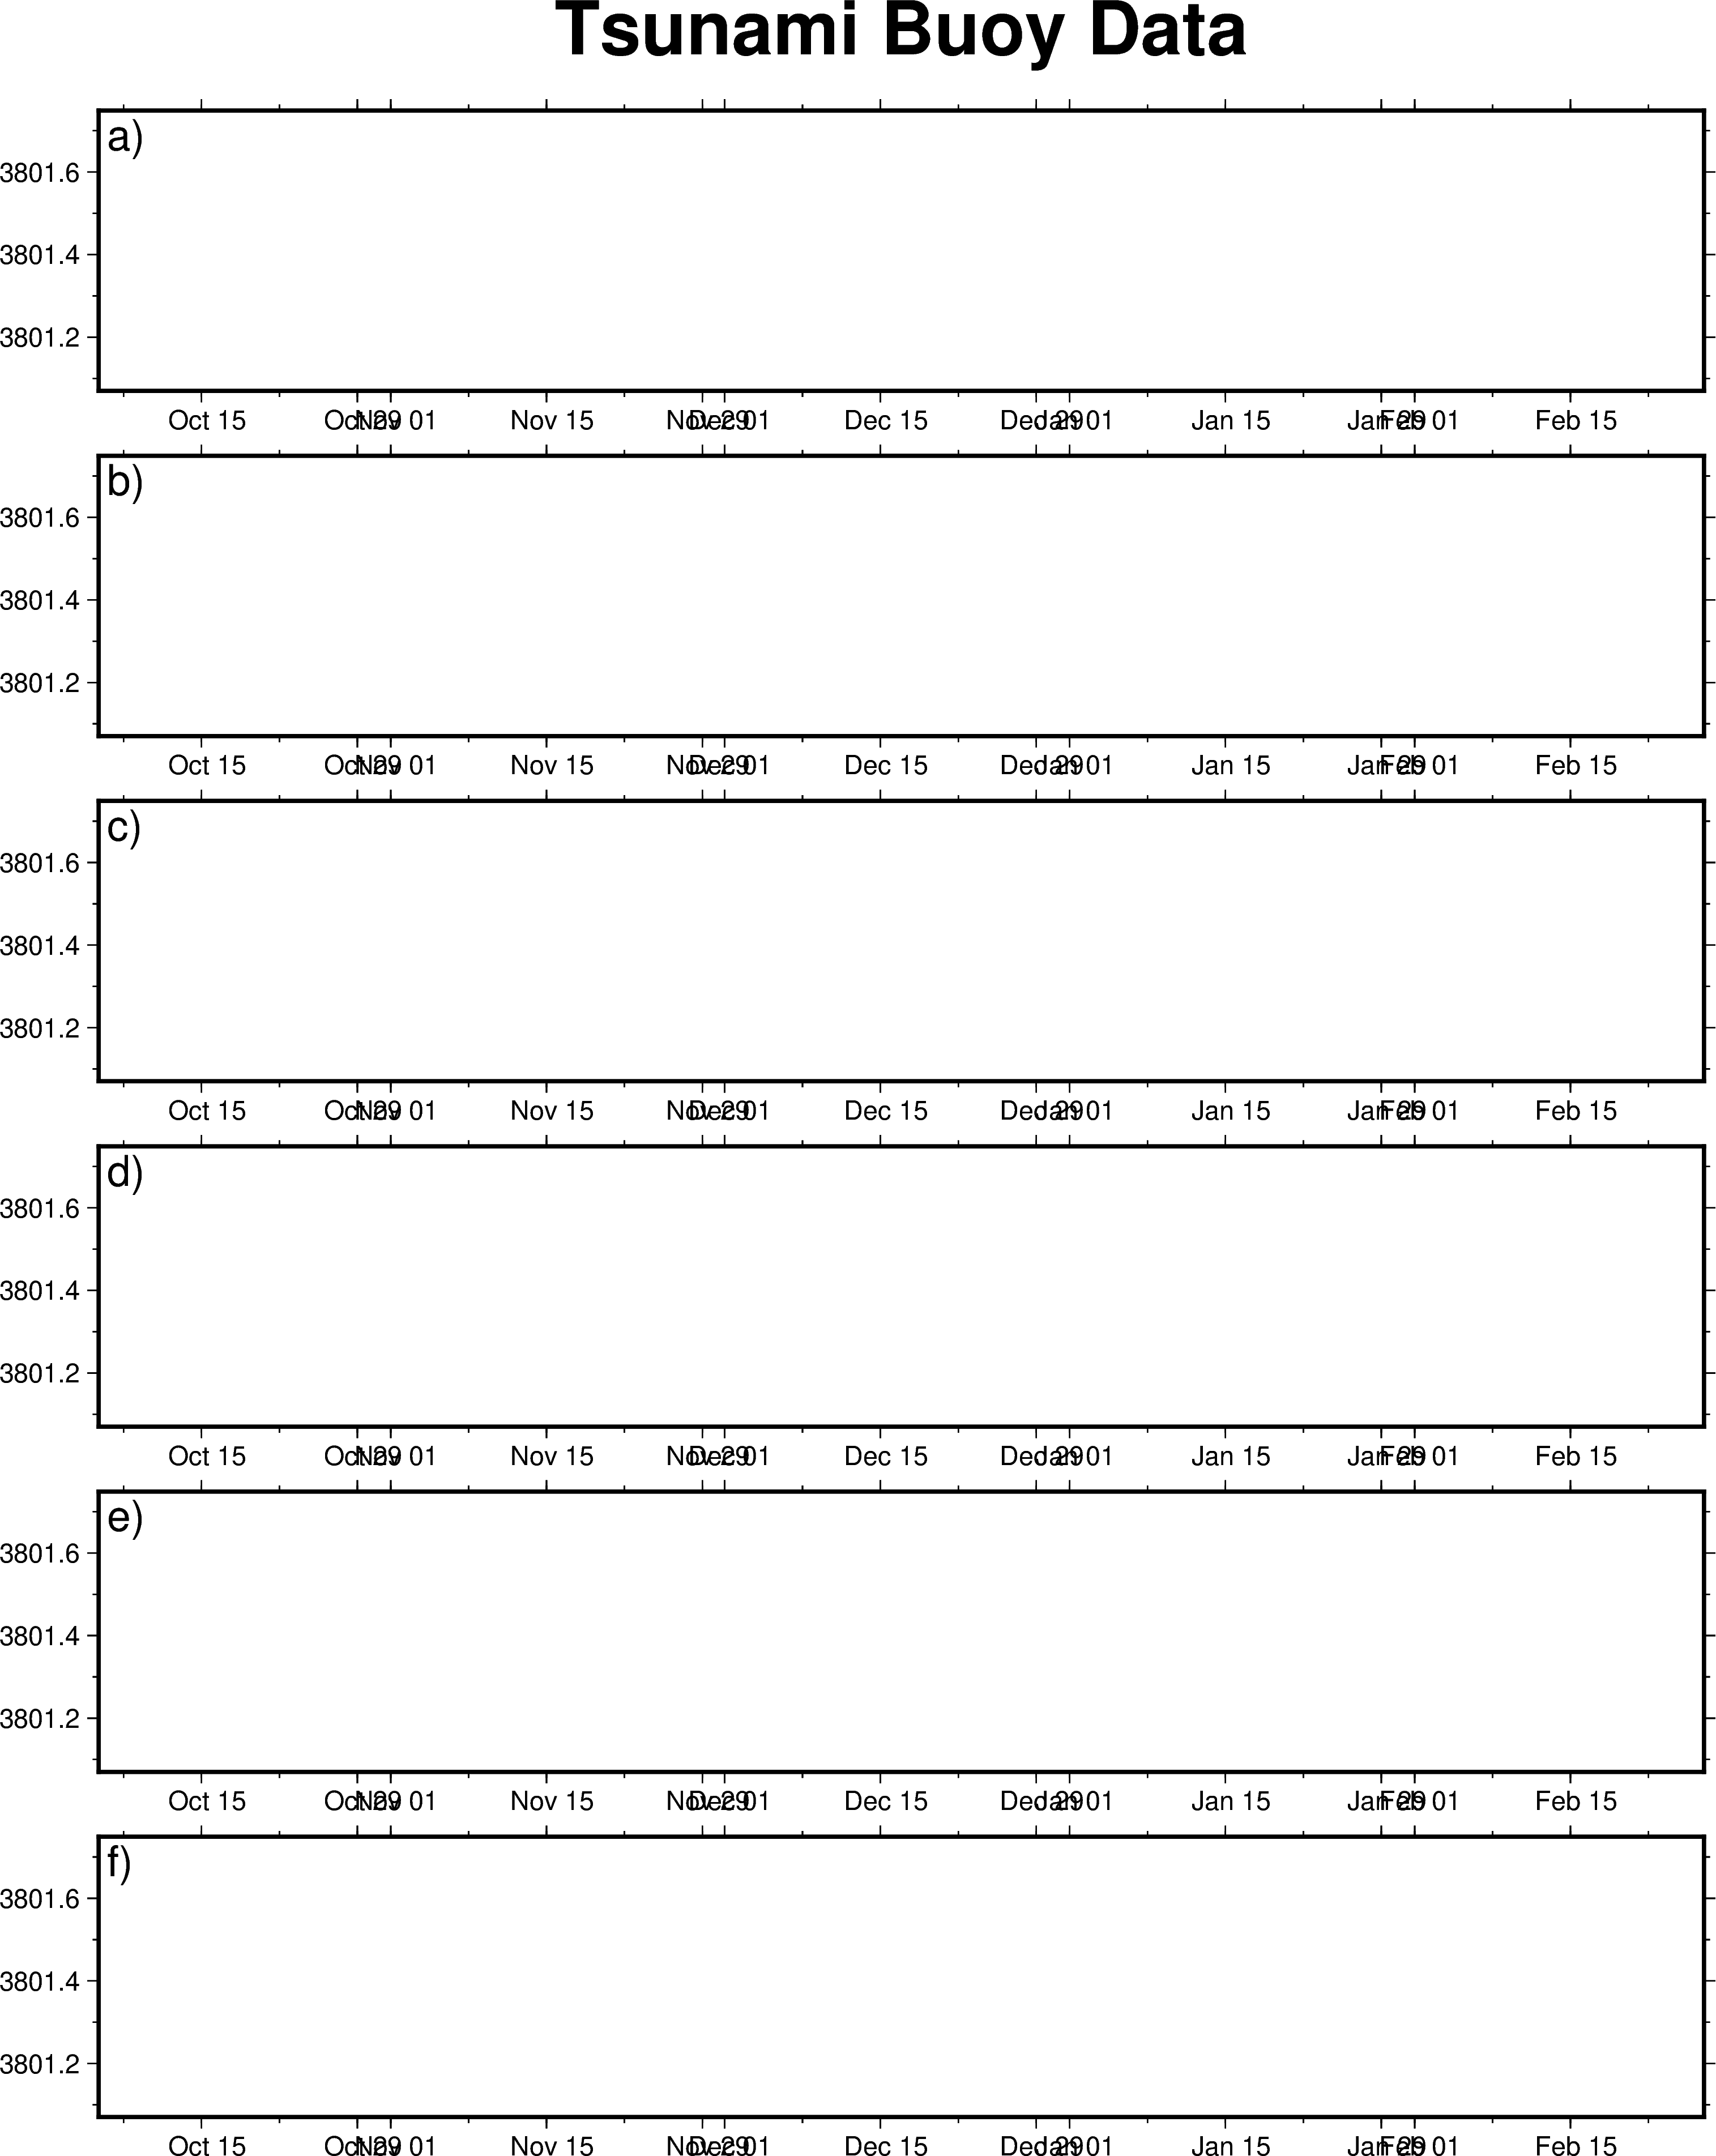

In [13]:
fig = pygmt.Figure()

projection =  "X?"
region = [x1.min(), x1.max(), y1.min(), y1.max()]

with fig.subplot(
    nrows = 6, ncols =1, 
    figsize = ("24c","30c"), 
    autolabel = True, 
    margins=["0.2c"],
    title = "Tsunami Buoy Data"
):
    fig.basemap(
        region=region, projection = projection, frame = ["af", "WSne"], panel = [0, 0]
    )
    fig.basemap(
        region=region, projection = projection, frame = ["af", "WSne"], panel = [1, 0]
    )
    fig.basemap(
        region=region, projection = projection, frame = ["af", "WSne"], panel = [2, 0]
    )
    fig.basemap(
        region=region, projection = projection, frame = ["af", "WSne"], panel = [3, 0]
    )
    fig.basemap(
        region=region, projection = projection, frame = ["af", "WSne"], panel = [4, 0]
    )
    fig.basemap(
        region=region, projection = projection, frame = ["af", "WSne"], panel = [5, 0]
    )

fig.show()

legend [WARNING]: File <stdin> is empty!


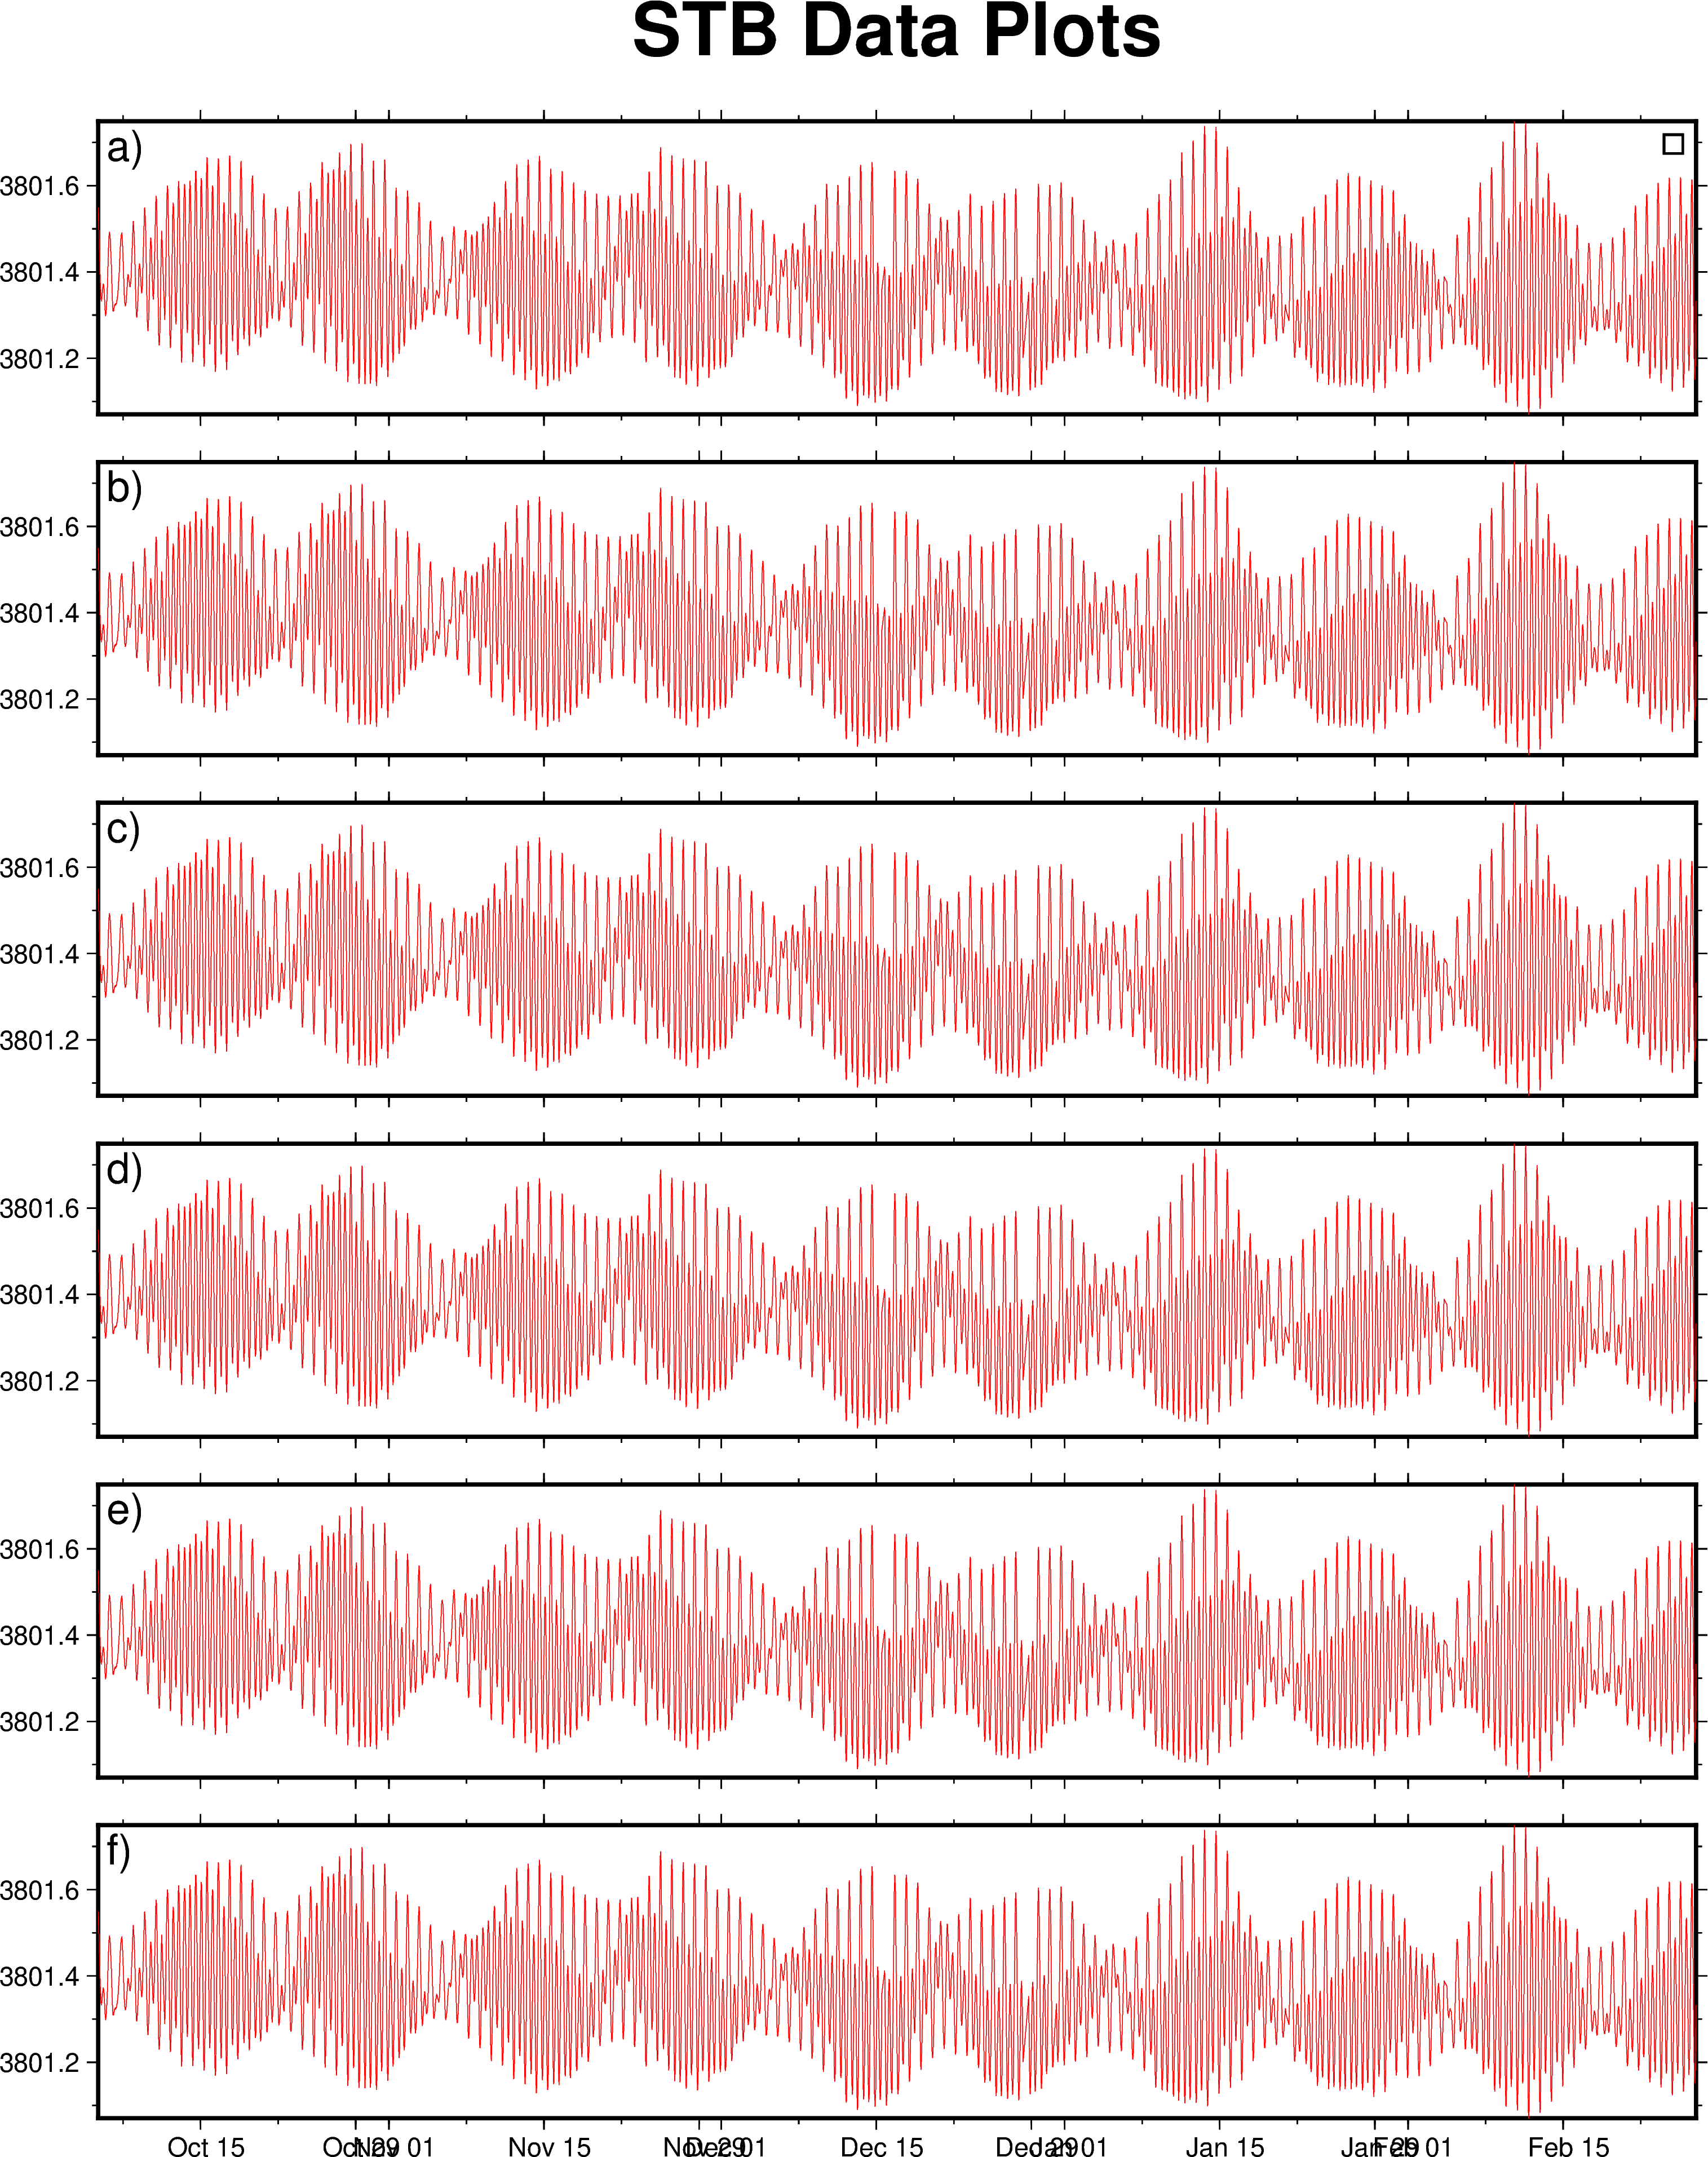

In [13]:
fig = pygmt.Figure()

region = [x1.min(), x1.max(), y1.min(), y1.max()]
projection = "X?"

with fig.subplot(
    nrows=6,
    ncols=1, 
    figsize = ("24c", "30c"), 
    margins = ["0.2c"],
    title = "STB Data Plots",
    #frame="lrtb", 
    autolabel = True,
    frame = ["af", "WSne"],
    sharex = "b",
    
):
    for i in range(6):
        fig.basemap(region=region, projection=projection, panel=[i])
        fig.plot(x=x1, y=y1, pen = "0.25p,red")


fig.legend()

fig.show()
    

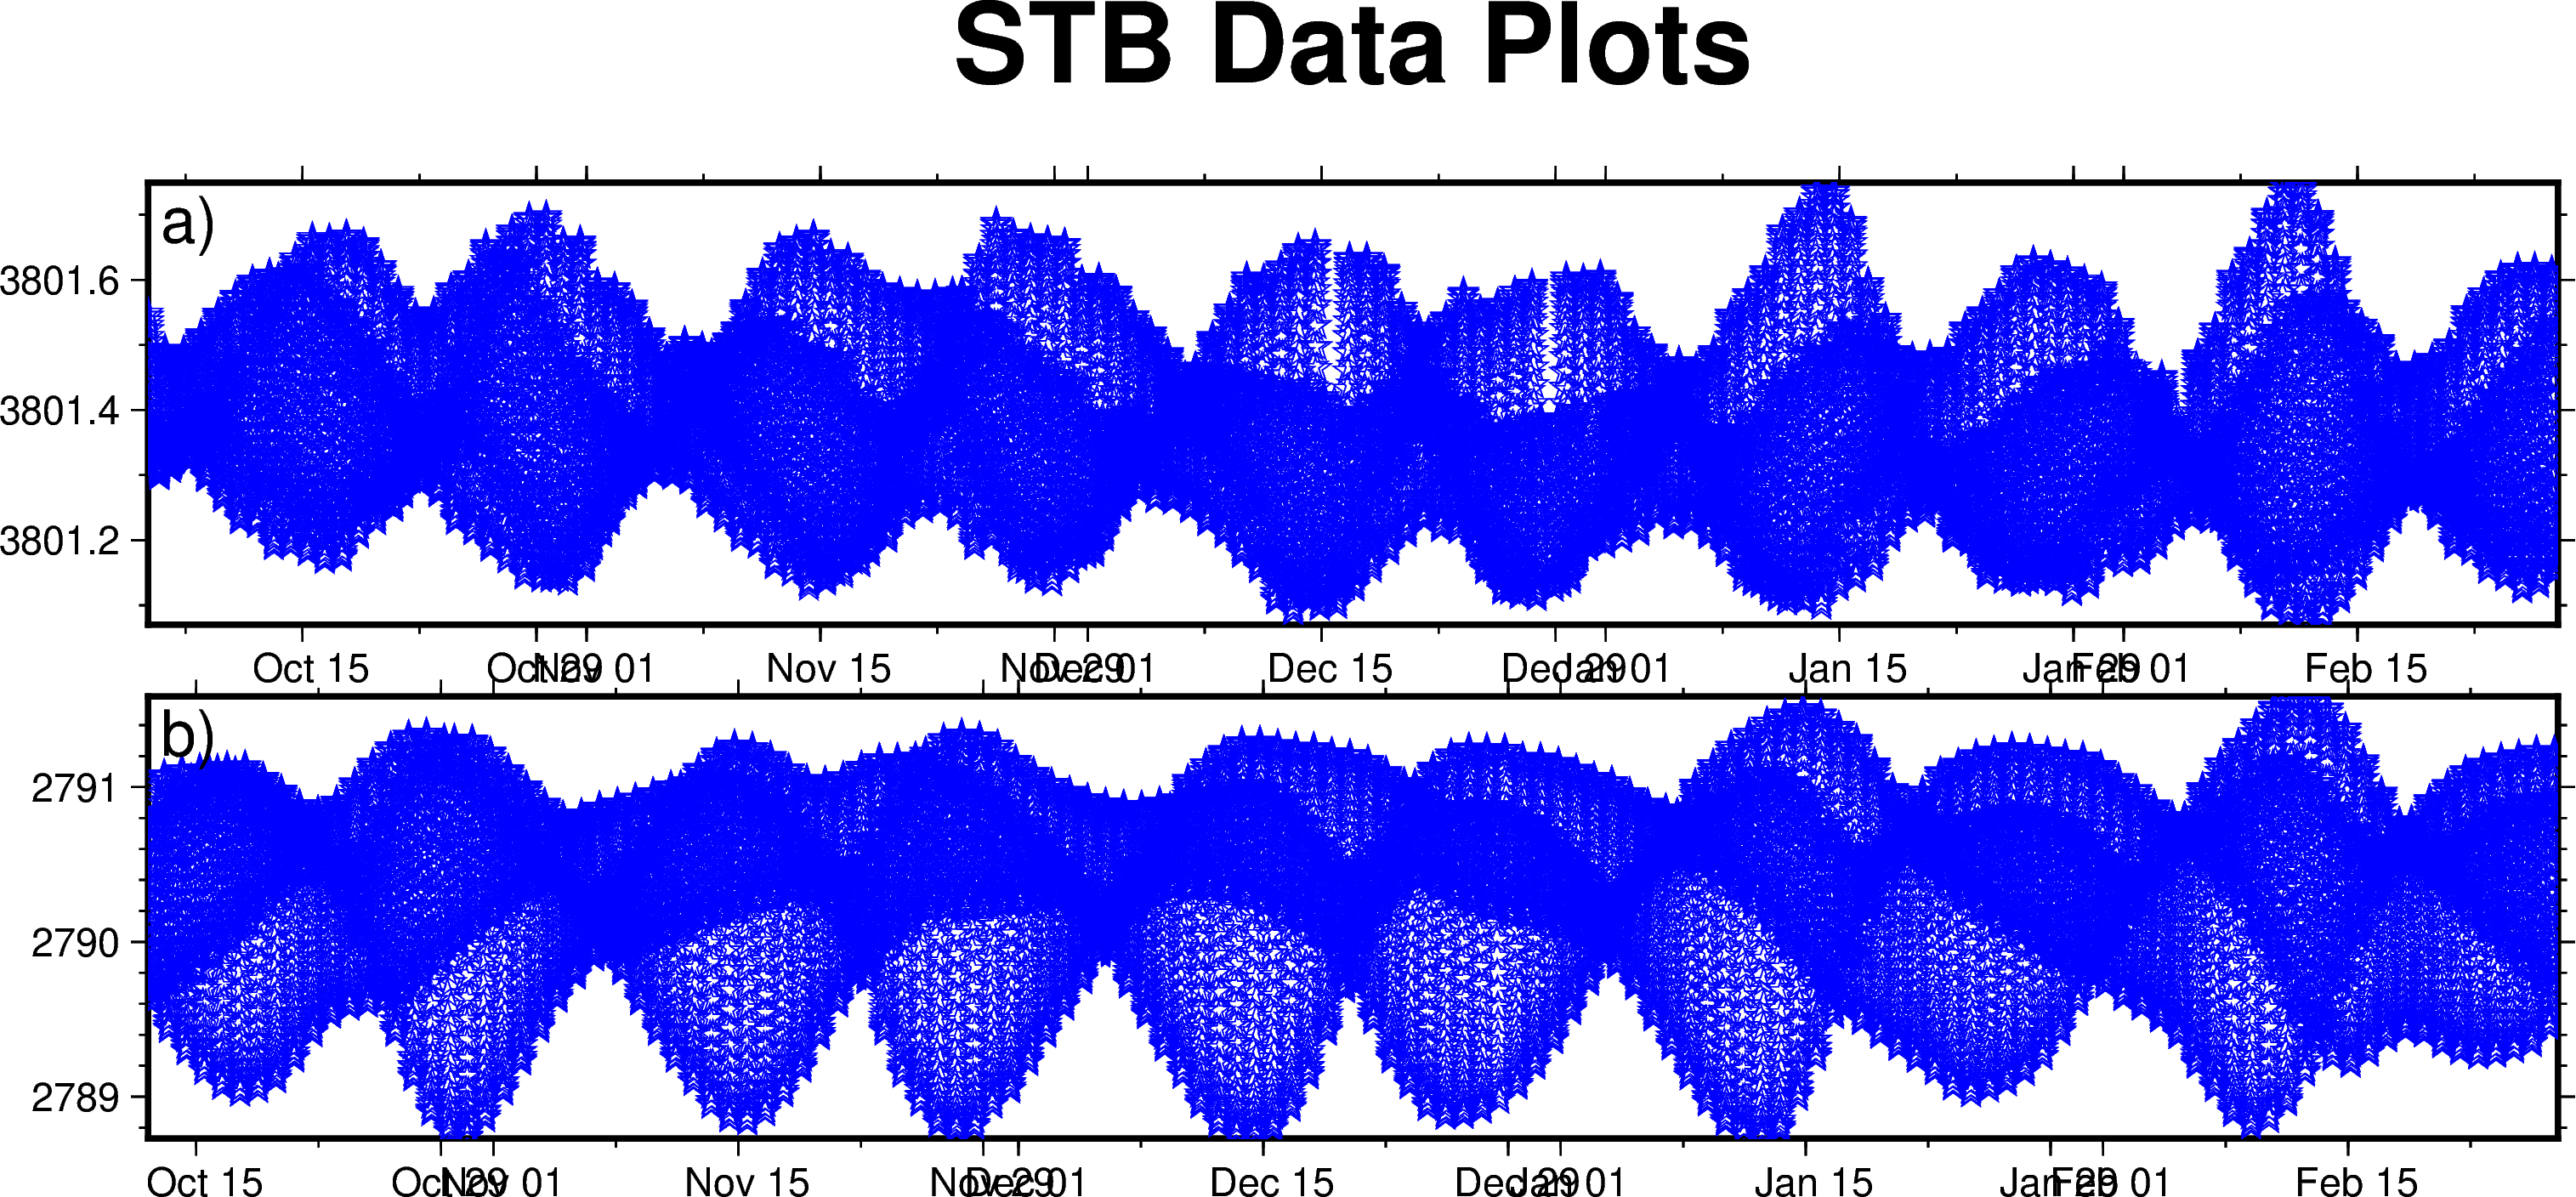

In [15]:
fig = pygmt.Figure()

region1 = [x1.min(), x1.max(), y1.min(), y1.max()]
region2 = [x2.min(), x2.max(), y2.min(), y2.max()]

projection = "X?"

with fig.subplot(
    nrows=6,
    ncols=1, 
    figsize = ("24c", "30c"), 
    margins = ["0.2c"],
    title = "STB Data Plots",
    #frame="lrtb", 
    autolabel = True,
    frame = ["af", "WSne"],
    sharex = True,
    
):
    fig.basemap(
        region=region1, projection=projection, frame=["af", "WSne"], panel=[0]
    )
    fig.plot(x=x1, y=y1, style="a0.3c", pen = "0.3p,blue")
    fig.basemap(
        region=region2, projection=projection, frame=["af", "WSne"], panel=[1]
    )
    fig.plot(x=x2, y=y2, style= "a0.3c", pen = "0.3p,blue")


fig.show()

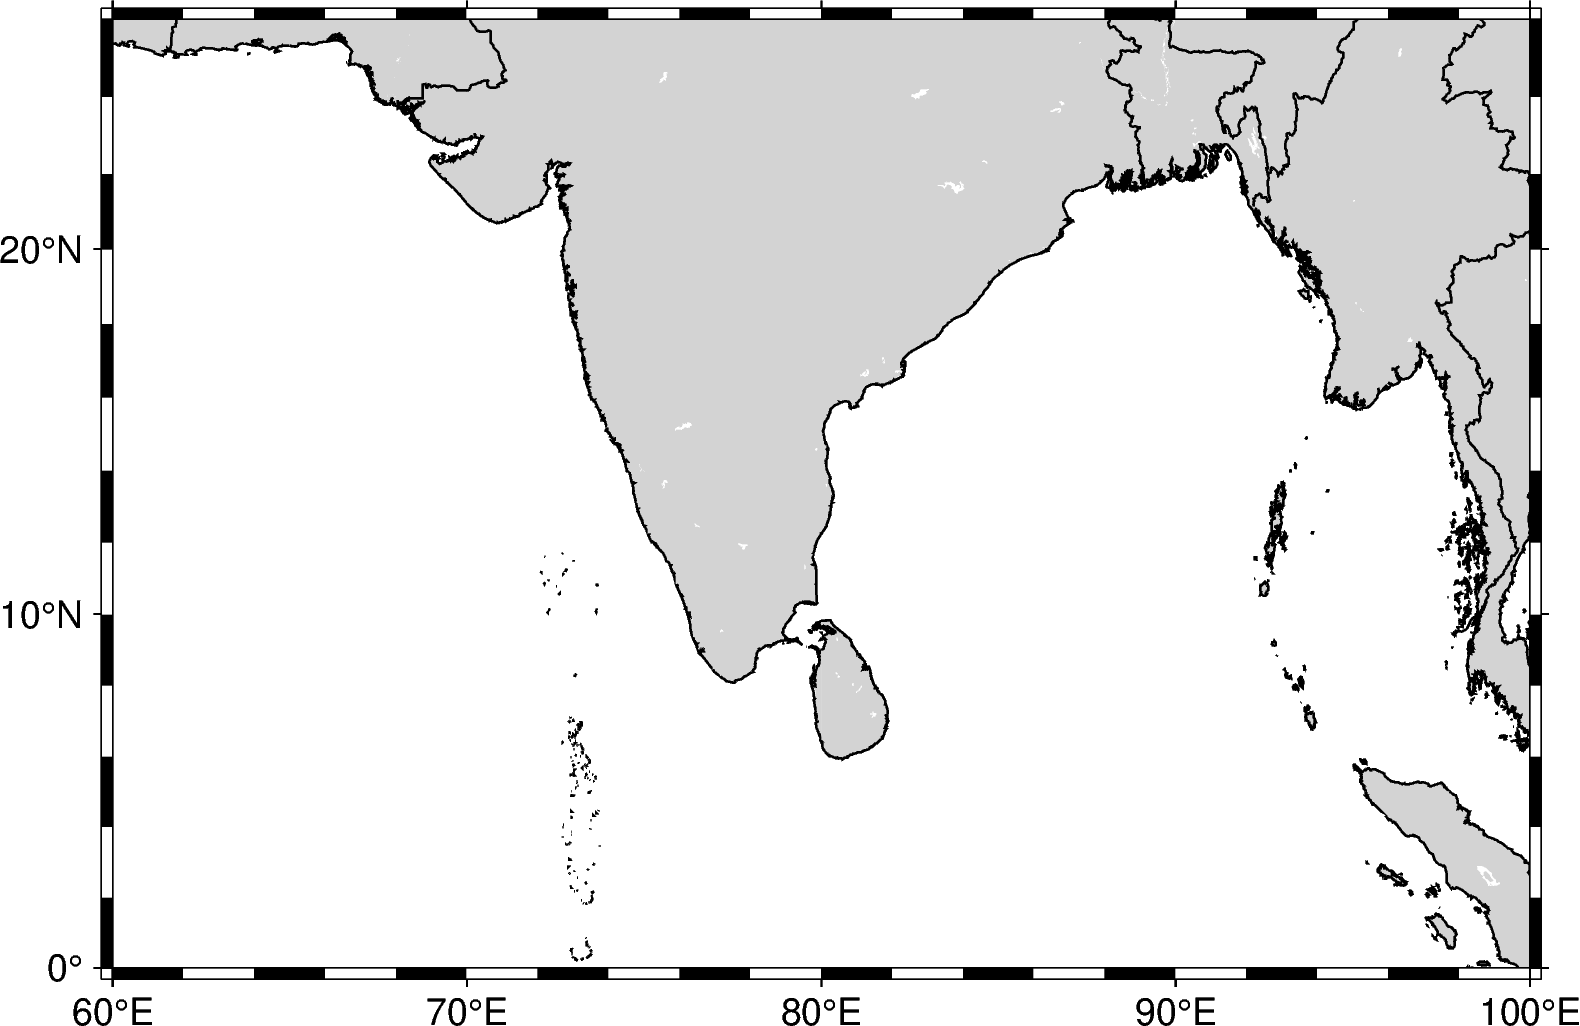

In [14]:
fig = pygmt.Figure()

projection = ["M12c"]
region = [60, 100, 0, 26]

fig.coast(
    shorelines = "1/0.5p", 
    region = region, 
    projection = projection, 
    borders="1/0.5p",
    land="lightgray",
    water="white",
)

fig.basemap(
    region = region,
    projection = projection,
    frame=["WSne", "xaf+lx-axis", "yaf+ly-axis"],
    
   
)

#frame=["WSne", "xaf+lx-axis", "yaf+ly-axis", "+tIndian Ocean Region"]
fig.show()

In [31]:
fig = pygmt.Figure()

projection = "M12c"
region = [60, 100, 0, 26]

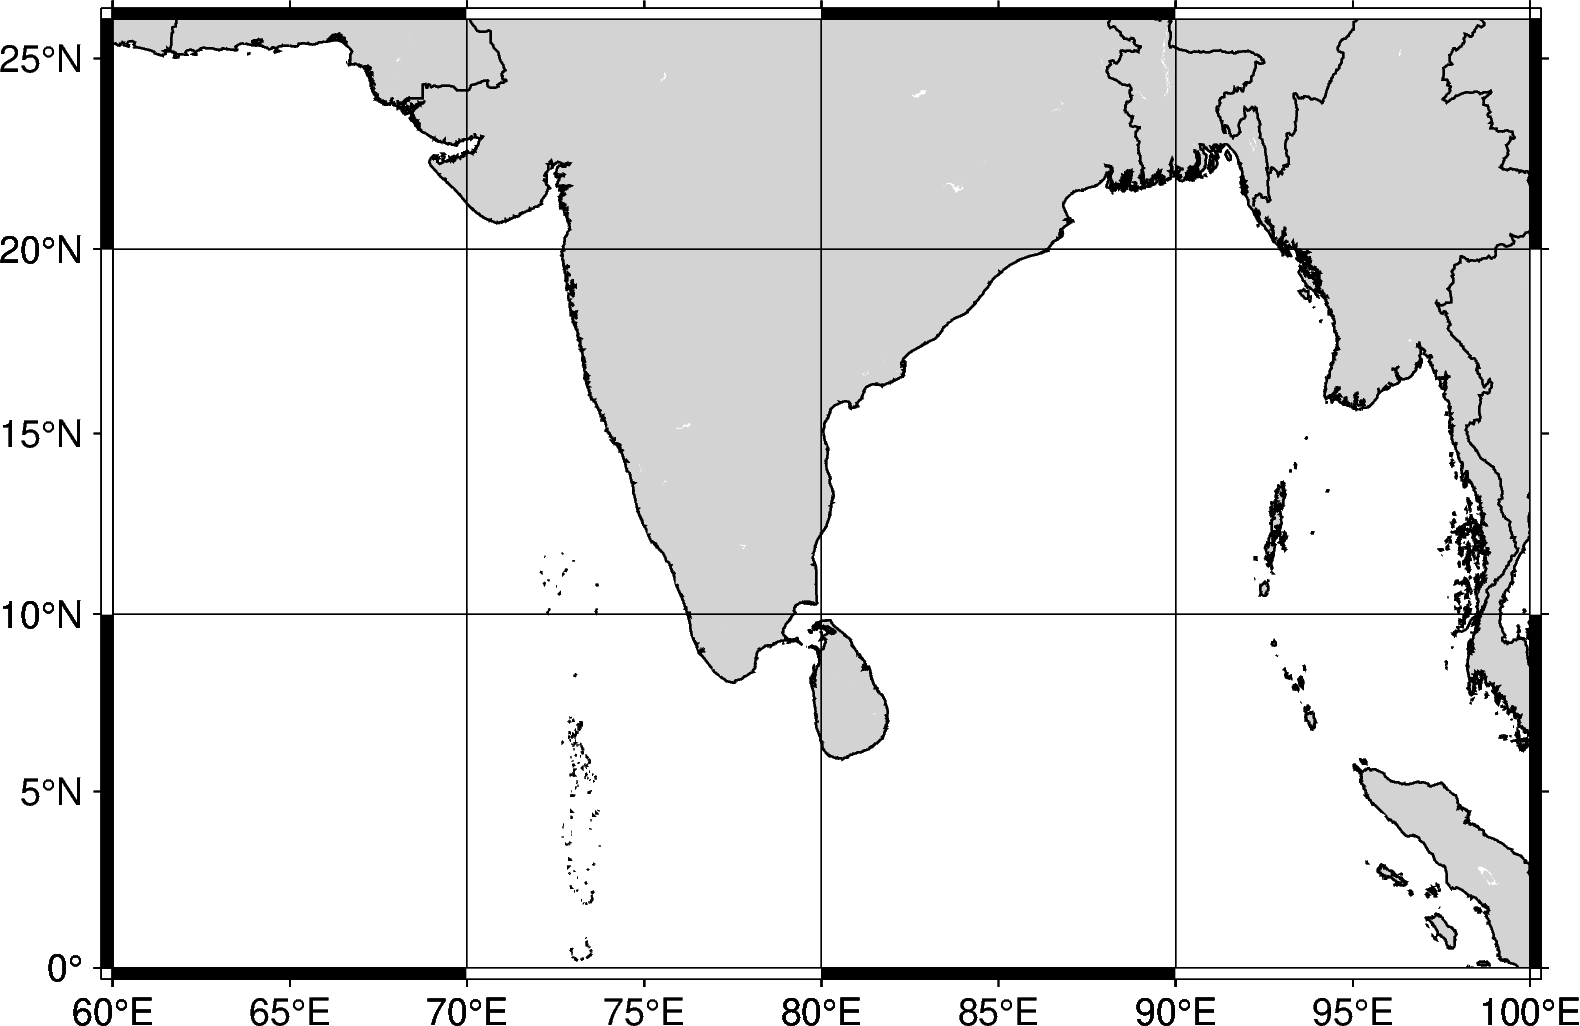

In [32]:
fig.basemap(
    region = region,
    projection = projection, 
    frame = "a5"

)

fig.coast(
    shorelines="1/0.5p", 
    region=region, 
    projection=projection, 
    borders = "1/0.5p", 
    land= "lightgrey", 
    frame="ag"
)

fig.show()

In [1]:
#stb_01.head()


In [2]:
#stb_02.head()

In [38]:
region1 = [stb_01.index.min(), stb_01.index.max(),stb_01["Water Level"].min(), stb_01["Water Level"].max()]
region2 = [stb_02.index.min(), stb_02.index.max(),stb_02["Water Level"].min(), stb_02["Water Level"].max()]

In [39]:
for i in region1:
    print(i)

for i in region2:
    print(i)

2023-10-05 18:15:00
2024-02-27 00:00:00
3801.07
3801.749
2023-10-12 06:15:00
2024-02-27 00:00:00
2788.728
2791.584


In [3]:
data1 = pd.read_csv('E:\\INCOIS WORK\\DATA\\stb-01\\stb-01.csv')
data2 = pd.read_csv('E:\\INCOIS WORK\\DATA\\stb-02\\stb-02.csv')

In [4]:
data1["date-time"] = pd.to_datetime(data1['Date']+" "+data1["Time"], dayfirst = True)
data2["date-time"] = pd.to_datetime(data2['Date']+" "+data2["Time"], dayfirst = True)

In [5]:
data1["Date"] = pd.to_datetime(data1['Date'], dayfirst = True)
data2["Date"] = pd.to_datetime(data2['Date'], dayfirst = True)

In [108]:
# target_month = 10
# target_year = 2023

# filt_data1 = stb_01[(stb_01['datetime'].dt.month == target_month) & (stb_01['datetime'].dt.year == target_year)]
# filt_data2 = stb_02[(stb_02['datetime'].dt.month == target_month) & (stb_02['datetime'].dt.year == target_year)]

In [109]:
# filt_data1 = data1[(data1['Date'].dt.month == target_month) & (data1['Date'].dt.year == target_year)]
# filt_data2 = data2[(data2['Date'].dt.month == target_month) & (data2['Date'].dt.year == target_year)]

In [6]:
# STB-01 Data Preparation
sep = data1[(data1['date-time'].dt.month == 9) & (data1['date-time'].dt.year == 2023)]
oct = data1[(data1['date-time'].dt.month == 10) & (data1['date-time'].dt.year == 2023)]
nov = data1[(data1['date-time'].dt.month == 11) & (data1['date-time'].dt.year == 2023)]
dec = data1[(data1['date-time'].dt.month == 12) & (data1['date-time'].dt.year == 2023)]
jan = data1[(data1['date-time'].dt.month == 1) & (data1['date-time'].dt.year == 2024)]
feb = data1[(data1['date-time'].dt.month == 2) & (data1['date-time'].dt.year == 2024)]

#STB-02 Data Preparation
sep2 = data2[(data2['date-time'].dt.month == 9) & (data2['date-time'].dt.year == 2023)]
oct2 = data2[(data2['date-time'].dt.month == 10) & (data2['date-time'].dt.year == 2023)]
nov2 = data2[(data2['date-time'].dt.month == 11) & (data2['date-time'].dt.year == 2023)]
dec2 = data2[(data2['date-time'].dt.month == 12) & (data2['date-time'].dt.year == 2023)]
jan2 = data2[(data2['date-time'].dt.month == 1) & (data2['date-time'].dt.year == 2024)]
feb2 = data2[(data2['date-time'].dt.month == 2) & (data2['date-time'].dt.year == 2024)]

In [92]:
#filt_data1
#filt_data2

In [22]:
def data_count(month_list):
    for month in month_list:
        

2449

In [7]:
# STB-01 Data Data Prep
sep_x = sep["date-time"]
oct_x = oct["date-time"]
nov_x = nov["date-time"]
dec_x = dec["date-time"]
jan_x = jan["date-time"]
feb_x = feb["date-time"]

sep_y = sep["Water Level"]
oct_y = oct["Water Level"]
nov_y = nov["Water Level"]
dec_y = dec["Water Level"]
jan_y = jan["Water Level"]
feb_y = feb["Water Level"]

# STB-02 Data Data Prep
sep2_x = sep2["date-time"]
oct2_x = oct2["date-time"]
nov2_x = nov2["date-time"]
dec2_x = dec2["date-time"]
jan2_x = jan2["date-time"]
feb2_x = feb2["date-time"]

sep2_y = sep2["Water Level"]
oct2_y = oct2["Water Level"]
nov2_y = nov2["Water Level"]
dec2_y = dec2["Water Level"]
jan2_y = jan2["Water Level"]
feb2_y = feb2["Water Level"]

In [8]:
feb2_y

0       2789.737
1       2789.793
2       2789.860
3       2789.938
4       2790.022
          ...   
2492    2790.100
2493    2790.173
2494    2790.253
2495    2790.335
2496    2790.418
Name: Water Level, Length: 2497, dtype: float64

In [13]:
fig = pygmt.Figure()

# STB-01 Data 
region0 = [sep_x.min(), sep_x.max(), sep_y.min(), sep_y.max()]
region1 = [oct_x.min(), oct_x.max(), oct_y.min(), oct_y.max()]
region2 = [nov_x.min(), nov_x.max(), nov_y.min(), nov_y.max()]
region3 = [dec_x.min(), dec_x.max(), dec_y.min(), dec_y.max()]
region4 = [jan_x.min(), jan_x.max(), jan_y.min(), jan_y.max()]
region5 = [feb_x.min(), feb_x.max(), feb_y.min(), feb_y.max()]

# STB-02 Data 
region20 = [sep2_x.min(), sep2_x.max(), sep2_y.min(), sep2_y.max()]
region21 = [oct2_x.min(), oct2_x.max(), oct2_y.min(), oct2_y.max()]
region22 = [nov2_x.min(), nov2_x.max(), nov2_y.min(), nov2_y.max()]
region23 = [dec2_x.min(), dec2_x.max(), dec2_y.min(), dec2_y.max()]
region24 = [jan2_x.min(), jan2_x.max(), jan2_y.min(), jan2_y.max()]
region25 = [feb2_x.min(), feb2_x.max(), feb2_y.min(), feb2_y.max()]

#region2 = [0, 32, y2.min(), y2.max()]
#region1 = [x1.min(), x1.max(), y1.min(), y1.max()]
#region2 = [x2.min(), x2.max(), y2.min(), y2.max()]

projection = "X?"

with fig.subplot(
    nrows=6,
    ncols=2, 
    figsize = ("76c", "50c"), 
    margins = ["0.5c"],
    title = "STB-01 Data Plots",
    #frame="lrtb", 
    autolabel = True,
    frame = ["af", "WSne"],
    sharex = True,
    
):
    # STB-01 Map Plotting------------------------------------------------
    
    
    fig.basemap(
        region=region1, projection=projection, frame=["af", "WSne"], panel=[1, 0]
    )
    fig.plot(x=oct_x, y=oct_y, style= "a0.2c", pen = "0.5p,blue")
    
    fig.basemap(
        region=region2, projection=projection, frame=["af", "WSne"], panel=[2, 0]
    )
    fig.plot(x=nov_x, y=nov_y, style= "a0.2c", pen = "0.5p,blue")

    fig.basemap(
        region=region3, projection=projection, frame=["af", "WSne"], panel=[3, 0]
    )
    fig.plot(x=dec_x, y=dec_y, style= "a0.2c", pen = "0.5p,blue")

    fig.basemap(
        region=region4, projection=projection, frame=["af", "WSne"], panel=[4, 0]
    )
    fig.plot(x=jan_x, y=jan_y, style= "a0.2c", pen = "0.5p,blue")

    fig.basemap(
        region=region5, projection=projection, frame=["af", "WSne"], panel=[5, 0]
    )
    fig.plot(x=feb_x, y=feb_y, style= "a0.2c", pen = "0.5p,blue")
    
    # STB-02 Map Plotting----------------------------------------------------
    
    
    fig.basemap(
        region=region21, projection=projection, frame=["af", "WSne"], panel=[1, 1]
    )
    fig.plot(x=oct2_x, y=oct2_y, style= "a0.2c", pen = "0.5p,blue")
    
    fig.basemap(
        region=region22, projection=projection, frame=["af", "WSne"], panel=[2, 1]
    )
    fig.plot(x=nov2_x, y=nov2_y, style= "a0.2c", pen = "0.5p,blue")

    fig.basemap(
        region=region23, projection=projection, frame=["af", "WSne"], panel=[3, 1]
    )
    fig.plot(x=dec2_x, y=dec2_y, style= "a0.2c", pen = "0.5p,blue")

    fig.basemap(
        region=region24, projection=projection, frame=["af", "WSne"], panel=[4, 1]
    )
    fig.plot(x=jan2_x, y=jan2_y, style= "a0.2c", pen = "0.5p,blue")

    fig.basemap(
        region=region25, projection=projection, frame=["af", "WSne"], panel=[5, 1]
    )
    fig.plot(x=feb2_x, y=feb2_y, style= "a0.2c", pen = "0.5p,blue")



fig.show()
fig.savefig('STB Data Reception Since Deployment.png')

In [ ]:
# Data Preparation

# Loading Datasets into a pandas data frame.
data1 = pd.read_csv('E:\\INCOIS WORK\\DATA\\stb-01\\stb-01.csv')
data2 = pd.read_csv('E:\\INCOIS WORK\\DATA\\stb-02\\stb-02.csv')

# Converting into date-time format using pd.to_datetime method
data1["date-time"] = pd.to_datetime(data1['Date']+" "+data1["Time"], dayfirst = True)
data2["date-time"] = pd.to_datetime(data2['Date']+" "+data2["Time"], dayfirst = True)

# Converting Date column into a Date format using pd.to_datetime method
data1["Date"] = pd.to_datetime(data1['Date'], dayfirst = True)
data2["Date"] = pd.to_datetime(data2['Date'], dayfirst = True)